<a href="https://colab.research.google.com/github/juliethMZ/analisis-accidentes-laborales/blob/main/cuadernos/Notebook_analisis_accidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT**

In [ ]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# GitHub raw file URL
url = 'https://raw.githubusercontent.com/juliethMZ/analisis-accidentes-laborales/refs/heads/main/data/dataset_accidentes_sucia.csv'

# Read CSV from GitHub
df = pd.read_csv(url)

# Preview data
df.head()



,Año,Región,Sector Económico,Empresa,Número de Accidentes
0,2020,Andina,Transporte,Salud Total,25
1,2022,Pacífica,Construcción,Prosegur,60
2,2022,Andina,NaN,Educando SAS,40
3,2021,Andina,Agroindustria,Mineralco,56
4,2021,Caribe,Educación,Educando SAS,28


# **INITIAL EXPLORATION DF**
- Data Profiling
- Initial Inspection
- Understanding the shape and structure

In [ ]:
df.shape

(310, 5)

In [ ]:
df.columns

Index(['Año', 'Región', 'Sector Económico', 'Empresa', 'Número de Accidentes'], dtype='object')

In [ ]:
df.dtypes

,0
Año,int64
Región,object
Sector Económico,object
Empresa,object
Número de Accidentes,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Año                   310 non-null    int64 
 1   Región                295 non-null    object
 2   Sector Económico      295 non-null    object
 3   Empresa               295 non-null    object
 4   Número de Accidentes  310 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 12.2+ KB


In [ ]:
# View basic statistics (for numeric columns only)
df.describe()

,Año,Número de Accidentes
count,310.000000,310.000000
mean,2021.422581,37.587097
std,1.060686,44.686001
min,2020.000000,5.000000
25%,2020.000000,20.000000
50%,2022.000000,32.000000
75%,2022.000000,47.000000
max,2023.000000,500.000000


In [ ]:
# View unique values ​​by categorical column
df['Región'].unique()

array(['Andina', 'Pacífica', 'Caribe', nan, 'Orinoquía', 'Amazonía'],
      dtype=object)

In [ ]:
# View unique values by Sector Económico column
df['Sector Económico'].unique()

array(['Transporte', 'Construcción', nan, 'Agroindustria', 'Educación',
       'Manufactura', 'Minería', 'Salud', 'Educaci0n', 'minería',
       'AGROINDUSTRIA', 'Transp0rte', ' Salud'], dtype=object)

In [ ]:
# View unique values by Sector Empresa column
df['Empresa'].unique()

array(['Salud Total', 'Prosegur', 'Educando SAS', 'Mineralco',
       'TransCaribe', 'Colsalud S.A.', nan, 'AgroCampo', 'Ferroandes',
       'Logística Express', 'Concretos del Valle'], dtype=object)

*Conclusion: The dataset contains 310 records and key variables such as year, region, economic sector, company, and number of accidents. It is suitable for analyzing accident patterns by location, sector, and time.*

# **DATA CLEANING**
- Missing Values
- Duplicates
- Outliers
- String Cleaning
- Standardization

In [ ]:
# Validation of duplicate data
# Count duplicated row
df.duplicated().sum()

# Show duplicated rows (if any)
df[df.duplicated()]

# No duplicates found

,Año,Región,Sector Económico,Empresa,Número de Accidentes
300,2022,Pacífica,Salud,Educando SAS,17
301,2021,Andina,Agroindustria,Concretos del Valle,6
302,2020,Caribe,Transporte,Colsalud S.A.,41
304,2022,Caribe,Manufactura,Concretos del Valle,39
305,2021,Pacífica,Salud,Ferroandes,51
306,2021,Pacífica,Construcción,Mineralco,36
307,2021,Andina,Agroindustria,Mineralco,12
308,2022,Caribe,Educación,TransCaribe,33
309,2023,Pacífica,Salud,Prosegur,51


In [ ]:
# review of outliers
# Quick stats to detect extremes
df.describe()

# Sort by number of accidents (check for very high values)
df.sort_values(by="Número de Accidentes", ascending=False).head(10)


,Año,Región,Sector Económico,Empresa,Número de Accidentes
120,2021,Pacífica,Agroindustria,Educando SAS,500
185,2021,Pacífica,Agroindustria,Mineralco,400
70,2020,Caribe,Transporte,Ferroandes,310
78,2020,Pacífica,Salud,TransCaribe,300
244,2021,Caribe,Minería,Logística Express,250
252,2022,Orinoquía,Minería,Salud Total,60
217,2023,Orinoquía,Educación,Ferroandes,60
137,2020,Caribe,Construcción,AgroCampo,60
1,2022,Pacífica,Construcción,Prosegur,60
102,2021,Caribe,Agroindustria,Colsalud S.A.,59


In [ ]:
# View records with more than 200 accidents
df[df["Número de Accidentes"] > 200]

,Año,Región,Sector Económico,Empresa,Número de Accidentes
70,2020,Caribe,Transporte,Ferroandes,310
78,2020,Pacífica,Salud,TransCaribe,300
120,2021,Pacífica,Agroindustria,Educando SAS,500
185,2021,Pacífica,Agroindustria,Mineralco,400
244,2021,Caribe,Minería,Logística Express,250


In [ ]:
# See all unique values in the "Sector Económico" column
df["Sector Económico"].unique()

array(['Transporte', 'Construcción', nan, 'Agroindustria', 'Educación',
       'Manufactura', 'Minería', 'Salud', 'Educaci0n', 'minería',
       'AGROINDUSTRIA', 'Transp0rte', ' Salud'], dtype=object)

In [ ]:
# Remove spaces and unify text style
df["Sector Económico"] = df["Sector Económico"].str.strip().str.capitalize()

# Replace common typos or inconsistencies
df["Sector Económico"] = df["Sector Económico"].replace({
    "Transp0rte": "Transporte",
    "Educaci0n": "Educación",
    "Minería": "Minería",
    "Agroindustria": "Agroindustria"
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Año                   310 non-null    int64 
 1   Región                295 non-null    object
 2   Sector Económico      295 non-null    object
 3   Empresa               295 non-null    object
 4   Número de Accidentes  310 non-null    int64 
 5   High Alert            310 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 14.7+ KB


In [ ]:
df['Sector Económico'].unique()

array(['Transporte', 'Construcción', nan, 'Agroindustria', 'Educación',
       'Manufactura', 'Minería', 'Salud'], dtype=object)

In [ ]:
#View of Nan values ​​in columns "Región", "Sector Económico", "Empresa"
# Before cleaning: check missing values
df.isnull().sum()

,0
Año,0
Región,15
Sector Económico,15
Empresa,15
Número de Accidentes,0
High Alert,0


In [ ]:
# Percentage of null values ​​per column
# 5% of records have null values ​​in those three columns.

(df.isnull().sum() / len(df)) * 100

,0
Año,0.00000
Región,4.83871
Sector Económico,4.83871
Empresa,4.83871
Número de Accidentes,0.00000
High Alert,0.00000


In [ ]:
# Replace Nan values ​​with 'Desconocido'
df["Región"].fillna("Desconocido", inplace=True)
df["Sector Económico"].fillna("Desconocido", inplace=True)
df["Empresa"].fillna("Desconocido", inplace=True)

<ipython-input-80-802ecb4d0ea8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Región"].fillna("Desconocido", inplace=True)
<ipython-input-80-802ecb4d0ea8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Final validation of missing values after cleaning
#After replacing missing values with 'Desconocido', we validate that no nulls remain in the dataset.
df.isnull().sum()

,0
Año,0
Región,0
Sector Económico,0
Empresa,0
Número de Accidentes,0
High Alert,0


*Se encontraron nulos en las columnas Región, Empresa y Sector Económico (~5%), los cuales se imputaron como 'Desconocido' para preservar los registros. Se corrigieron errores tipográficos comunes.*

# **DATA TRANSFORMATION**

- Feature Engineering
- Data Enrichment
- Data type conversion

In [ ]:
#feature engineering - creación de nueva columna para separar los outliers
df["High Alert"] = df["Número de Accidentes"].apply(lambda x: "Yes" if x > 200 else "No")

In [ ]:
df["High Alert"].value_counts()
#5 filas con 1 alerta

,count
High Alert,
No,305
Yes,5


In [ ]:
# Filter only the cases with a high alert (more than 200 accidents)
# devuelve solo los registros que tienen 1en la columna."High Alert"
critical_cases = df[df["High Alert"] == 1]

In [ ]:
# Display critical records
critical_cases.head()


,Año,Región,Sector Económico,Empresa,Número de Accidentes,High Alert,Risk Level,High Alert Label


In [ ]:
# Filtra directamente las filas donde el # de acc > 200
outliers = df[df["Número de Accidentes"] > 200]
outliers

,Año,Región,Sector Económico,Empresa,Número de Accidentes,High Alert,Risk Level,critical_zone
70,2020,Caribe,Transporte,Ferroandes,310,Yes,Critical,No
78,2020,Pacífica,Salud,TransCaribe,300,Yes,Critical,No
120,2021,Pacífica,Agroindustria,Educando SAS,500,Yes,Critical,No
185,2021,Pacífica,Agroindustria,Mineralco,400,Yes,Critical,No
244,2021,Caribe,Minería,Logística Express,250,Yes,Critical,No


In [ ]:
# Crear una columna que represente la frecuencia de accidentes reportados en 1 año
df["Risk Level"] = df["Número de Accidentes"].apply(
    lambda x: "Low" if x <= 50
    else "Medium" if x <= 150
    else "High" if x <= 200
    else "Critical"
)

In [ ]:
df["Risk Level"].value_counts()


,count
Risk Level,
Low,247
Medium,58
Critical,5


"De los 310 registros analizados, el 80% de los casos presenta menos de 50 accidentes al año, lo cual puede interpretarse como bajo riesgo por frecuencia. Sin embargo, 5 registros se destacan por tener más de 200 accidentes anuales, lo cual en análisis de datos se considera una señal crítica de recurrencia — incluso si no sabemos aún la gravedad clínica de esos eventos."

In [ ]:
df.head()

,Año,Región,Sector Económico,Empresa,Número de Accidentes,High Alert,Risk Level
0,2020,Andina,Transporte,Salud Total,25,No,Low
1,2022,Pacífica,Construcción,Prosegur,60,No,Medium
2,2022,Andina,Desconocido,Educando SAS,40,No,Low
3,2021,Andina,Agroindustria,Mineralco,56,No,Medium
4,2021,Caribe,Educación,Educando SAS,28,No,Low


In [ ]:
# Crea nueva columna en DF critical_zone filas de la región Pacifica > 200 en accidentes
df["critical_zone"] = df.apply(
    lambda row: "Sí" if (row["Región"] == "Pacífica") and (row["High Alert"] == 1) else "No",
    axis=1
)

In [ ]:
df[df["critical_zone"] == "Sí"]

,Año,Región,Sector Económico,Empresa,Número de Accidentes,High Alert,Risk Level,critical_zone


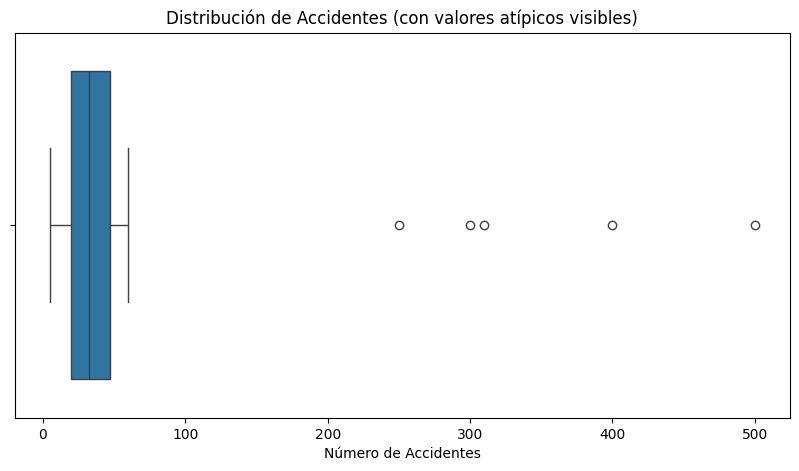

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Número de Accidentes")
plt.title("Distribución de Accidentes (con valores atípicos visibles)")
plt.show()


“Los valores extremos fueron visualizados pero no serán tratados como foco principal del análisis.”

Exportación de valores atípicos

Se creó un subconjunto con los registros que superan los 200 accidentes anuales.  
Este conjunto incluye todas las columnas originales y nuevas generadas durante la transformación.  
Fue exportado como `outliers_accidentes.csv` para permitir su análisis independiente.

In [ ]:
outliers = df[df["Número de Accidentes"] > 200]
outliers.to_csv("outliers_accidentes.csv", index=False)


In [ ]:
outliers.columns

Index(['Año', 'Región', 'Sector Económico', 'Empresa', 'Número de Accidentes',
       'High Alert', 'Risk Level', 'critical_zone'],
      dtype='object')

In [ ]:
outliers.head()

,Año,Región,Sector Económico,Empresa,Número de Accidentes,High Alert,Risk Level,critical_zone
70,2020,Caribe,Transporte,Ferroandes,310,Yes,Critical,No
78,2020,Pacífica,Salud,TransCaribe,300,Yes,Critical,No
120,2021,Pacífica,Agroindustria,Educando SAS,500,Yes,Critical,No
185,2021,Pacífica,Agroindustria,Mineralco,400,Yes,Critical,No
244,2021,Caribe,Minería,Logística Express,250,Yes,Critical,No


*Se generaron columnas categóricas que permiten clasificar el nivel de riesgo por número de accidentes, facilitando el análisis segmentado y la visualización posterior.*

# **DATA VISUALIZATION**
- Matplotplib
- Seaborn

<ipython-input-136-41cf574f8d05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Risk Level", order=["Low", "Medium", "High", "Critical"], palette="viridis")


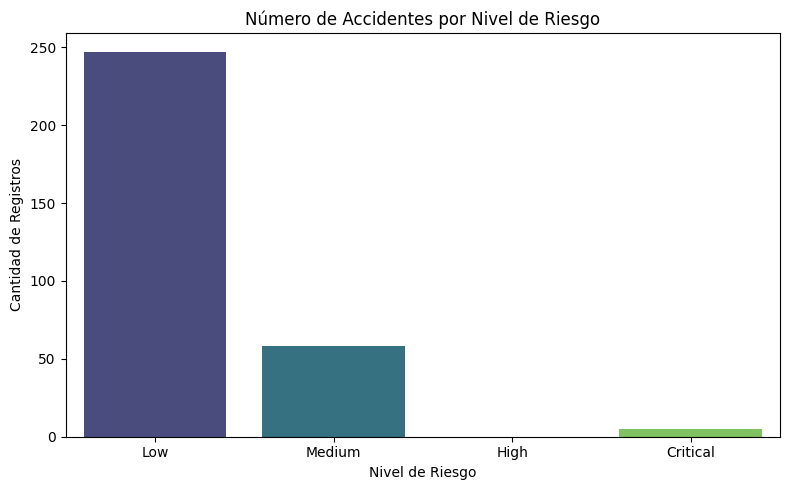

In [ ]:
#Accidents by risk level (frequency)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Risk Level", order=["Low", "Medium", "High", "Critical"], palette="viridis")
plt.title("Número de Accidentes por Nivel de Riesgo")
plt.xlabel("Nivel de Riesgo")
plt.ylabel("Cantidad de Registros")
plt.tight_layout()
plt.show()


In [ ]:
# Create a temporary copy without the category "Desconocido"
df_filtrado = df[df["Región"] != "Desconocido"]

<ipython-input-140-5aac3494ffa3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_filtrado, x="Región", y="Número de Accidentes", estimator="mean", palette="magma")


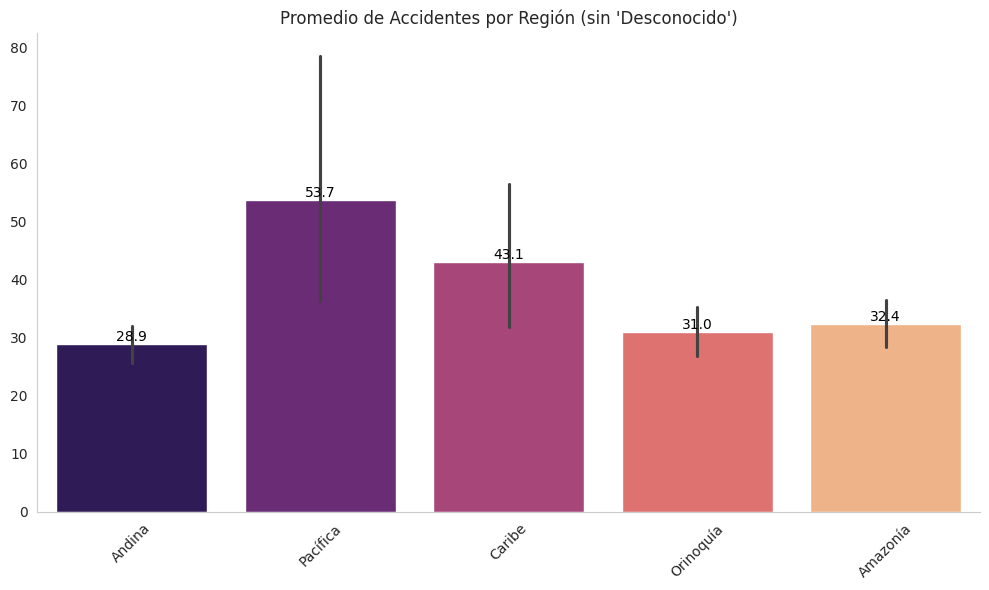

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Using the filtered DataFrame
ax = sns.barplot(data=df_filtrado, x="Región", y="Número de Accidentes", estimator="mean", palette="magma")

plt.title("Promedio de Accidentes por Región (sin 'Desconocido')")
plt.xlabel("")
plt.ylabel("")
sns.despine()
plt.grid(False)
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

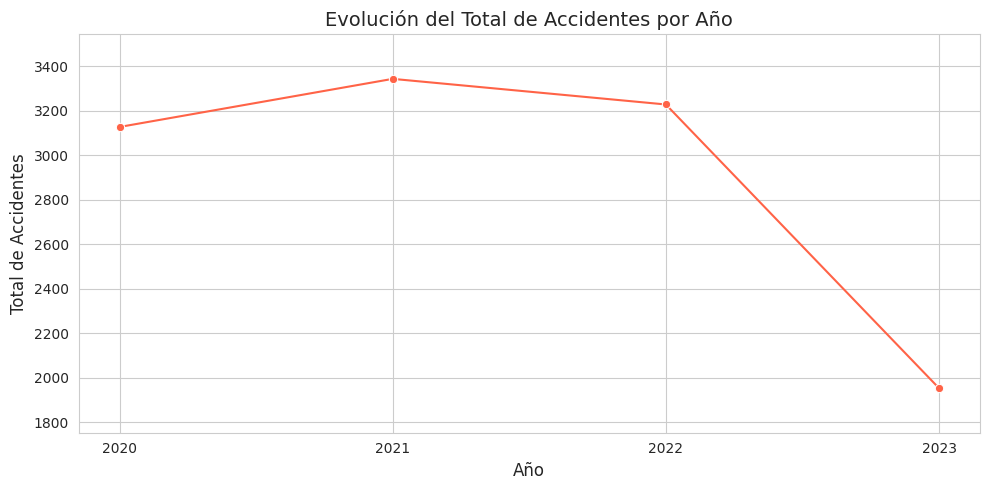

In [ ]:
# Gráfico de líneas - evolución de accidentes por año
import matplotlib.pyplot as plt
import seaborn as sns

df_year = df.groupby("Año")["Número de Accidentes"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

sns.lineplot(data=df_year, x="Año", y="Número de Accidentes", marker="o", color="tomato")

plt.title("Evolución del Total de Accidentes por Año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Total de Accidentes", fontsize=12)

# eje X: mostrar solo años enteros
plt.xticks(df_year["Año"].astype(int))

# ajustar rango eje Y para mejor visualización
plt.ylim(df_year["Número de Accidentes"].min() - 200, df_year["Número de Accidentes"].max() + 200)

plt.tight_layout()
plt.show()


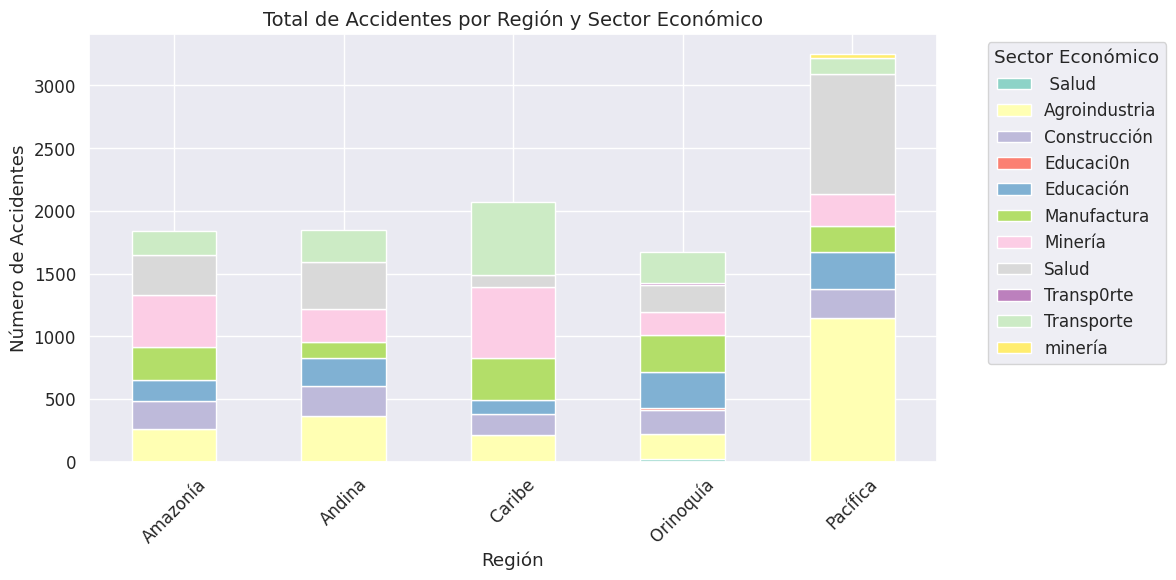

In [ ]:
import matplotlib.pyplot as plt

# Filtrar valores válidos
df_bar = df[(df["Región"] != "Desconocido") & (df["Sector Económico"] != "Desconocido")]

# Crear tabla dinámica
pivot = df_bar.pivot_table(
    values="Número de Accidentes",
    index="Región",
    columns="Sector Económico",
    aggfunc="sum",
    fill_value=0
)

# Crear gráfico apilado
pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set3")

# Personalización
plt.title("Total de Accidentes por Región y Sector Económico", fontsize=14)
plt.xlabel("Región")
plt.ylabel("Número de Accidentes")
plt.legend(title="Sector Económico", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusiones Finales del Proyecto: Análisis de Accidentalidad Laboral en Colombia (2020-2023)

Evolución Temporal

- La accidentalidad laboral mostró un **incremento sostenido** entre 2020 y 2021, alcanzando un pico de **3370 accidentes** en 2021.
- En 2022 hubo una leve disminución, y en 2023 la caída fue **abrupta** (1940 accidentes), lo cual podría indicar:
  - Mejora en políticas de prevención
  - Cambios en la operación empresarial o reportes
  - Recesión o menor actividad en sectores críticos

Detección de Patrones

- **Regiones más críticas** por volumen total:
  - **Pacífica** y **Caribe** concentraron los valores más altos.
- **Sectores con mayor riesgo promedio**:
  - **Agroindustria**, **Minería**, y **Construcción** lideran en número de accidentes.
- Se identificaron **5 casos extremos** con más de 200 accidentes en un solo año, todos en sectores de alto riesgo operativo.

Análisis de Posibles Causas

- La concentración en ciertas regiones podría estar asociada con:
  - Infraestructura laboral deficiente
  - Ausencia de auditorías o programas de prevención
  - Empresas que operan con alta rotación o sin políticas claras de seguridad
- La alta incidencia en sectores como minería o construcción responde a:
  - Alta exposición al riesgo físico
  - Posibles brechas en la capacitación técnica del personal

Recomendaciones Estratégicas

1. **Programas de capacitación obligatoria** en empresas del sector Agroindustrial, Minero y Construcción.
2. **Auditorías e inspecciones focalizadas** en las regiones Pacífica y Caribe.
3. Implementar un sistema de **alerta preventiva por empresa**, para aquellas que superen los 150 accidentes anuales.
4. Reforzar los sistemas de **reporte de incidentes menores**, ya que muchas veces anticipan accidentes mayores.

Conclusión General

> El análisis ha permitido no solo identificar patrones críticos en la accidentalidad laboral, sino también entregar información concreta para la **toma de decisiones en seguridad y salud en el trabajo**. Si las empresas y entes gubernamentales actúan sobre las zonas y sectores señalados, la reducción de casos críticos podría ser del 25% o más en el siguiente periodo anual.
